# Hotel booking demand
Determine if the booking has been collected (1) or not (0)

Columns
- ADR - Средняя цена за номер/ночь.
- Adults - Кол-во взрослых
- Agent - ID туристического агентства, которое сделало заказ
- ArrivalDateDayOfMonth
- ArrivalDateMonth
- ArrivalDateWeekNumber
- ArrivalDateYear
- AssignedRoomType - Код для типа номера, назначенного для бронирования. Иногда назначенный тип номера отличается от типа зарезервированного номера по причинам, связанным с работой отеля (например, из-за избыточного бронирования) или по запросу клиента
- Babies - Количество младенцев
- BookingChanges - Количество изменений / дополнений, внесенных в бронирование с момента внесения бронирования в систему до момента заселения или отмены
- Children - Количество детей
- Company - ID компании / юридического лица, совершившего бронирование или ответственного за его оплату
- Country - Страна
- CustomerType - Тип бронирования, предполагающий одну из четырех категорий: Contract, Group, Transient, Transient-party
- DaysInWaitingList - Количество дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту
- DepositType - Индикация того, внес ли клиент залог для гарантии бронирования. Эта переменная может принимать три категории:
- No Deposit – депозит не вносился
- Non Refund - внесен залог в размере полной стоимости проживания
- Refundable - внесен залог в размере, меньшем общей стоимости проживания
- DistributionChannel - Канал распространения бронирования. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры»
- IsCanceled - Значение, указывающее, было ли бронирование отменено (1) или нет (0)
- IsRepeatedGuest - Значение, указывающее, было ли имя бронирования от повторного гостя (1) или нет (0)
- LeadTime - Количество дней, прошедших между датой ввода бронирования в систему и датой прибытия
- MarketSegment - Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры»
- Meal - Тип забронированного питания. Категории представлены в стандартных пакетах гостеприимства:
    - Undefined / SC - без питания;
    - BB - завтрак;
    - HB - завтрак и еще один прием пищи - обычно ужин);
    - FB - завтрак, обед и ужин
- PreviousBookingsNotCanceled - Количество предыдущих бронирований, которые не были отменены клиентом до текущего бронирования
- PreviousCancellations - Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
- RequiredCardParkingSpaces - Количество машиномест, требуемых заказчиком
- ReservationStatusDate - Дата, когда был установлен последний статус. Эта переменная может использоваться вместе с - ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля
- ReservedRoomType - Код типа номера забронирован
- StaysInWeekendNights - Количество ночей в выходные (суббота или воскресенье), которые гость проживал или забронировал для проживания в отеле
- StaysInWeekNights - Количество ночей в неделю (с понедельника по пятницу), которые гость останавливался или забронировал для проживания в отеле
- TotalOfSpecialRequests - Количество особых запросов, сделанных клиентом (например, две односпальные кровати или высокий этаж)

## Imports and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
train = pd.read_csv('data/train_final.csv')
train.shape

(44638, 29)

In [3]:
test = pd.read_csv('data/test_final.csv')
test.shape

(23525, 28)

## Data research

In [4]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


let's look at the ratio of the target variable in the data

In [5]:
train['is_canceled'].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

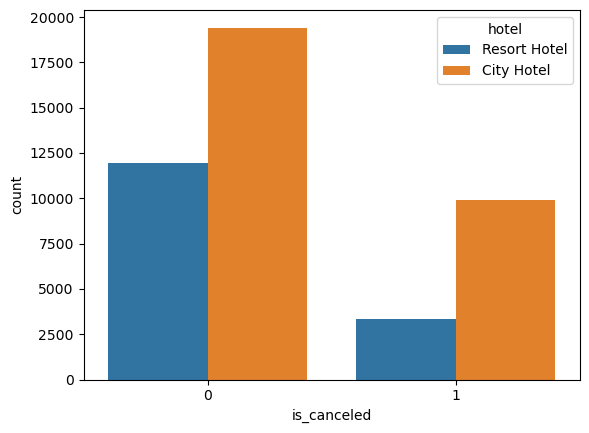

In [6]:
sns.countplot(x='is_canceled', data=train, hue='hotel');

Let's see how the distribution of the target variable depends on the others

In [9]:
train['is_assign_room_eq_reserved_room'] = train['assigned_room_type'] == train['reserved_room_type']

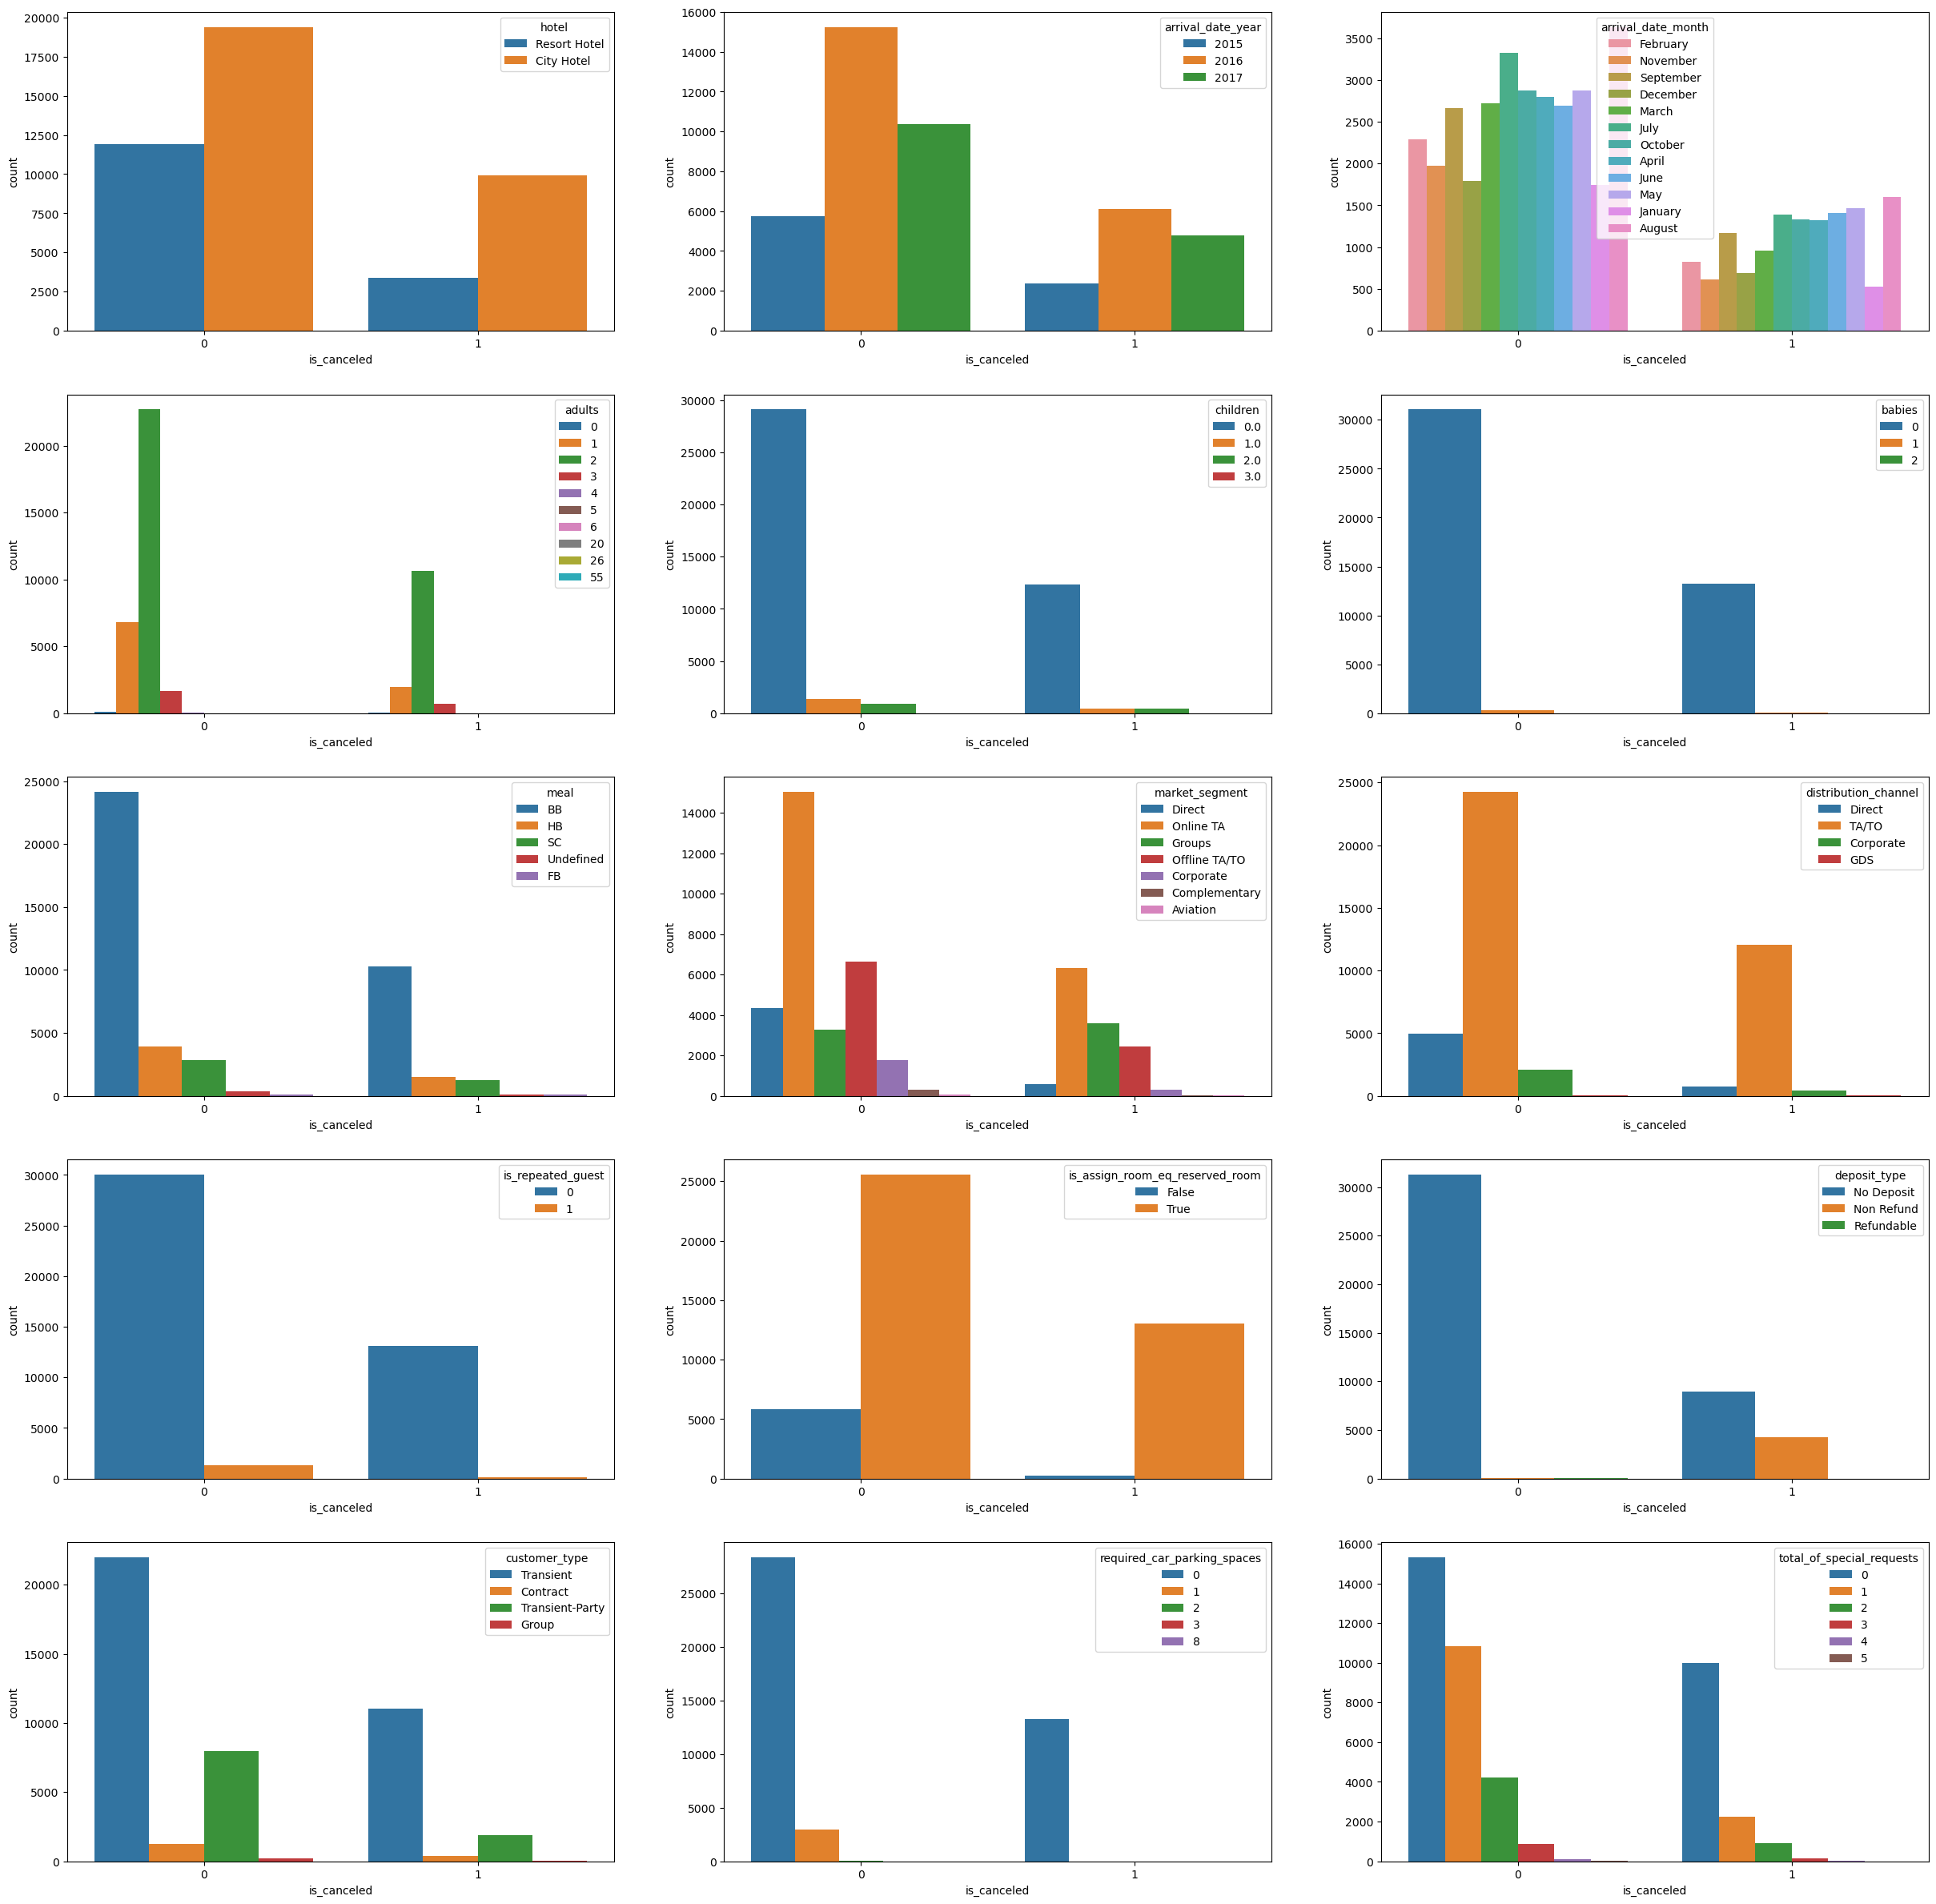

In [10]:
fig, axes = plt.subplots(5, 3, figsize=(30, 30))
i = 0
columns = ['hotel', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies', 'meal',
          'market_segment', 'distribution_channel', 'is_repeated_guest',
          'is_assign_room_eq_reserved_room', 'deposit_type', 'customer_type', 'required_car_parking_spaces',
          'total_of_special_requests']
for axe in axes:
    for ax in axe:
        sns.countplot(ax=ax, x='is_canceled', data=train, hue=columns[i])
        i += 1

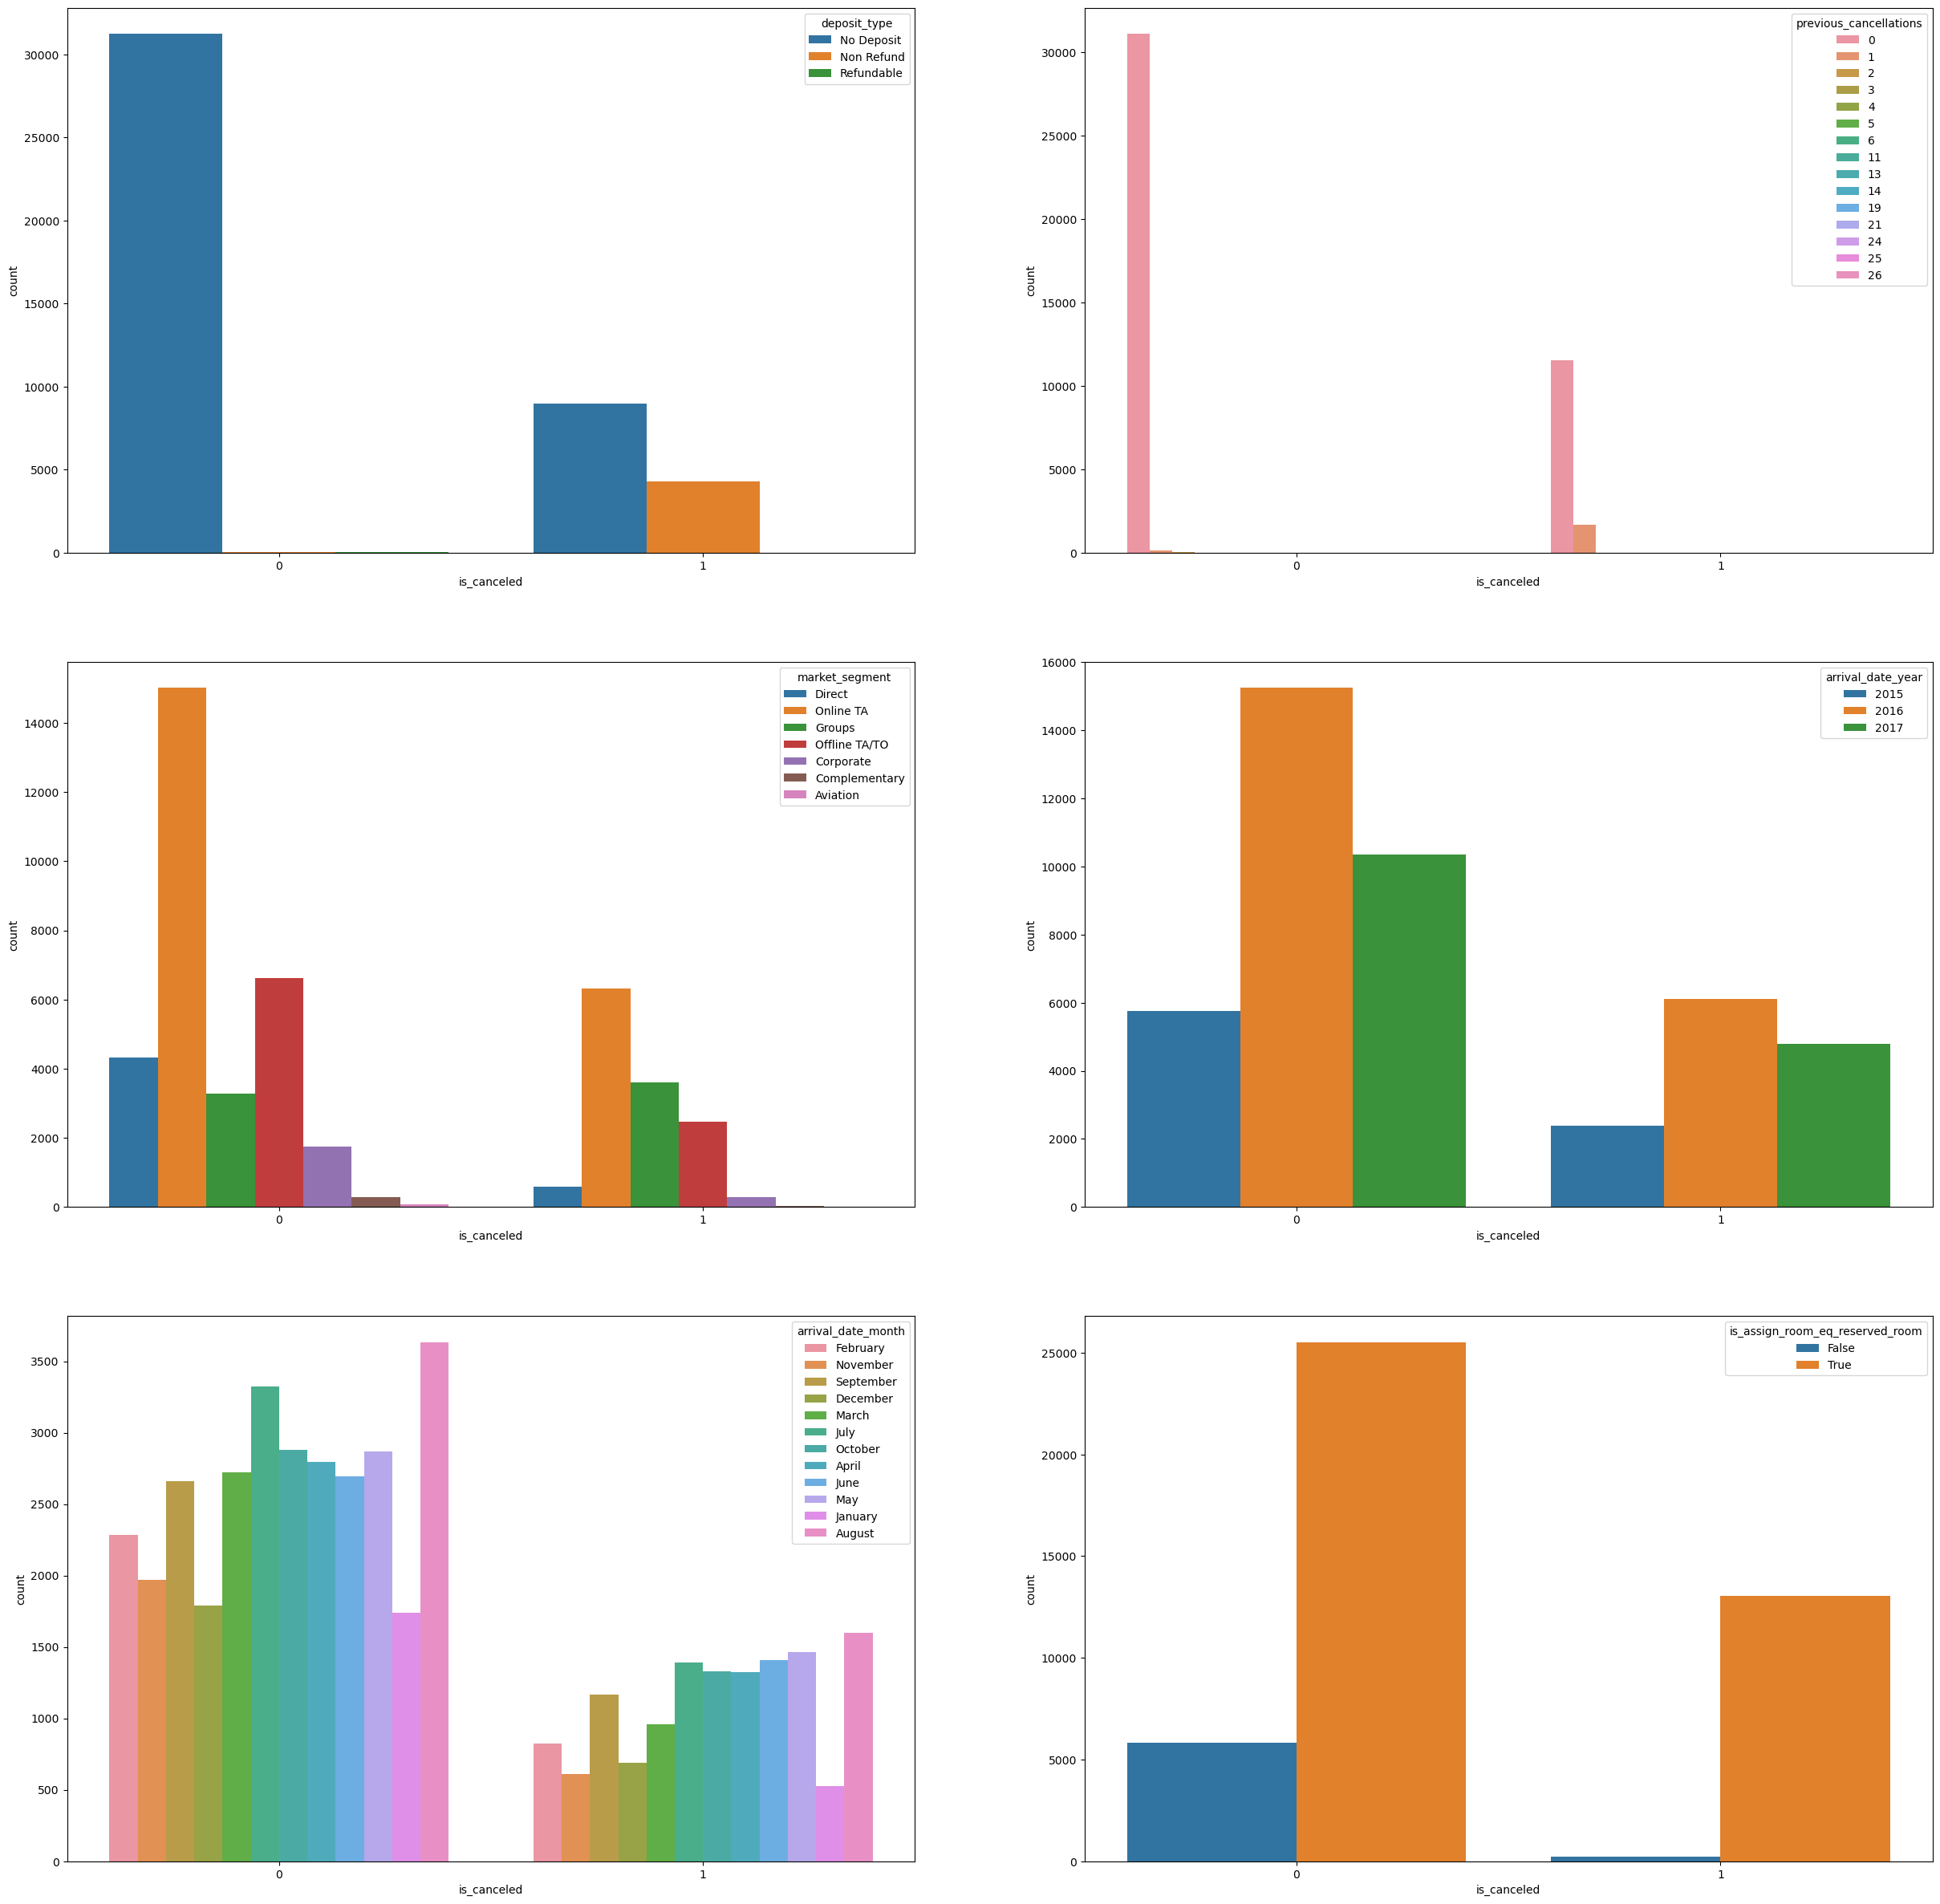

In [11]:
# we are interested in the following columns
columns_imp = ['deposit_type', 'previous_cancellations', 'market_segment',
               'arrival_date_year', 'arrival_date_month', 'is_assign_room_eq_reserved_room']
fig, axes = plt.subplots(3, 2, figsize=(30, 30))
i = 0
for axe in axes:
    for ax in axe:
        sns.countplot(ax=ax, x='is_canceled', data=train, hue=columns_imp[i])
        i += 1

- People with a deposit for some reason refuse to book
- If a person has already refused 1 time, then he will most likely refuse
- people who have booked through some groups are more likely to refuse
- people who have had their room changed are more likely to refuse

In [12]:
train.groupby('is_canceled')['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,31354.0,99.965409,49.270625,0.0,68.0,92.4,124.2000,510.0
1,13284.0,105.541052,46.151091,0.0,73.9,97.0,129.2125,437.0


## Feature engineering

Let's transform some similar features into one that is more informative

In [13]:
train['total_nights'] = train['stays_in_week_nights'] + train['stays_in_weekend_nights']
train.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'], inplace=True)

test['is_assign_room_eq_reserved_room'] = test['assigned_room_type'] == test['reserved_room_type']
test['total_nights'] = test['stays_in_week_nights'] + test['stays_in_weekend_nights']
test.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'], inplace=True)

train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,is_assign_room_eq_reserved_room,total_nights
0,Resort Hotel,0,3,2016,February,7,12,2,0.0,0,...,0,No Deposit,0,Transient,81.0,1,0,2016-02-14,False,2
1,City Hotel,1,50,2016,November,47,18,2,0.0,0,...,0,No Deposit,0,Transient,93.6,0,2,2016-10-09,True,3
2,City Hotel,0,14,2015,September,37,7,2,2.0,0,...,0,No Deposit,0,Contract,166.0,0,3,2015-09-13,True,6
3,City Hotel,0,18,2015,December,50,6,2,0.0,0,...,0,No Deposit,0,Transient,107.0,0,0,2015-12-08,True,2
4,City Hotel,1,263,2016,September,40,29,2,0.0,0,...,0,No Deposit,0,Transient,100.3,0,0,2016-01-18,True,6


In [14]:
train['previous_booking_total'] = train['previous_bookings_not_canceled'] + train['previous_cancellations']
train.drop(columns=['assigned_room_type', 'reserved_room_type', 'reservation_status_date'], inplace=True)

test['previous_booking_total'] = test['previous_bookings_not_canceled'] + test['previous_cancellations']
test.drop(columns=['assigned_room_type', 'reserved_room_type', 'reservation_status_date'], inplace=True)

In [15]:
train.drop('country', axis=1, inplace=True)
test.drop('country', axis=1, inplace=True)

In [16]:
train['is_assign_room_eq_reserved_room'] = train['is_assign_room_eq_reserved_room'].map({True: 1, False: 0})
test['is_assign_room_eq_reserved_room'] = test['is_assign_room_eq_reserved_room'].map({True: 1, False: 0})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hotel                            44638 non-null  object 
 1   is_canceled                      44638 non-null  int64  
 2   lead_time                        44638 non-null  int64  
 3   arrival_date_year                44638 non-null  int64  
 4   arrival_date_month               44638 non-null  object 
 5   arrival_date_week_number         44638 non-null  int64  
 6   arrival_date_day_of_month        44638 non-null  int64  
 7   adults                           44638 non-null  int64  
 8   children                         44638 non-null  float64
 9   babies                           44638 non-null  int64  
 10  meal                             44638 non-null  object 
 11  market_segment                   44638 non-null  object 
 12  distribution_chann

Encode the remaining string features

In [17]:
from sklearn.preprocessing import LabelEncoder

categ = train.loc[:, train.dtypes == object].columns

for col in categ:
    LE = LabelEncoder()
    train[col] = LE.fit_transform(train[col])
    
    test[col] = LE.transform(test[col])

train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_assign_room_eq_reserved_room,total_nights,previous_booking_total
0,1,0,3,2016,3,7,12,2,0.0,0,...,0,0,0,2,81.0,1,0,0,2,0
1,0,1,50,2016,9,47,18,2,0.0,0,...,0,0,0,2,93.6,0,2,1,3,0
2,0,0,14,2015,11,37,7,2,2.0,0,...,0,0,0,0,166.0,0,3,1,6,0
3,0,0,18,2015,2,50,6,2,0.0,0,...,0,0,0,2,107.0,0,0,1,2,0
4,0,1,263,2016,11,40,29,2,0.0,0,...,0,0,0,2,100.3,0,0,1,6,0


Create X and y datasets

In [18]:
X = train.drop(columns=['is_canceled'])
y = train['is_canceled']

## Data balancing

In [19]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

column = X.columns

print("До балансировки данных")
print(X.shape)
print(y.value_counts())

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['is_canceled'])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

До балансировки данных
(44638, 25)
0    31354
1    13284
Name: is_canceled, dtype: int64
После балансировки
(62708, 25)
is_canceled
0              31354
1              31354
dtype: int64


## Training model

### without balancing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LogisticRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(f'Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Precision: {precision_score(y_test, prediction)}')
print(f'Recall: {recall_score(y_test, prediction)}')

Accuracy: 0.799357825567503
Precision: 0.753916698509744
Recall: 0.49128486055776893


### with balancing

In [27]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=42)

In [28]:
model_b = LogisticRegression()

model_b.fit(X_train_b, y_train_b)

prediction_balanced = model_b.predict(X_test_b)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(f'Accuracy: {accuracy_score(y_test_b, prediction_balanced)}')
print(f'Precision: {precision_score(y_test_b, prediction_balanced)}')
print(f'Recall: {recall_score(y_test_b, prediction_balanced)}')

Accuracy: 0.7496412055493542
Precision: 0.746972860125261
Recall: 0.757890277483584


Recall has grown significantly compared to training without balancing classes, and the other metrics have not changed much

## Final predictions

In [30]:
y_pred_test = model_b.predict(test)

In [31]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("solution.csv", index=False)